# Introduction

Cyclistic is a fictional bike-share company based in Chicago, operating a fleet of over 5,800 classic and electric bikes. These bikes are geotracked and docked at 692 stations, allowing riders to unlock a bike from one station and return it to another at any time.

Cyclistic serves two primary user groups: casual riders and annual members. The company's marketing director believes that increasing the number of annual memberships is key to long-term success. My business objective is first to understand **how casual riders and annual members use Cyclistic bikes differently**.

#### Dataset overview

The dataset consists of 12 CSV files (one for each month), containing the following information:

- Categorical Columns:
  
  `ride_id`: Unique identifier for each ride.
  
  `rideable_type`: Type of bike (classic or electric).
  
  `start_station_name`, `start_station_id`: Starting station details.
  
  `end_station_name`, `end_station_id`: Ending station details.
  
  `member_casual`: User type (casual rider or annual member).

- Numerical Columns:

  `start_lat`, `start_lng`: Coordinates of the start station.
 
   `end_lat`, `end_lng`: Coordinates of the end station.

- Date-Time Columns:
  
  `started_at`, `ended_at`: Start and end timestamps for each ride.





# Data Cleaning & Preparation

Before proceeding with the analysis, I need to clean and preprocess the dataset to ensure accuracy and consistency.

#### Loading the Dataset

I used the `list.files()` function to dynamically extract all CSV file paths from the data directory:

In [1]:
library('tidyverse')

# retrieve all CSV file paths from the data directory
file_paths <- list.files('./data', pattern='*.csv', full.names=TRUE, recursive=TRUE)

# print file paths to confirm retrieval
print(file_paths)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


 [1] "./data/202401-divvy-tripdata.csv" "./data/202402-divvy-tripdata.csv"
 [3] "./data/202403-divvy-tripdata.csv" "./data/202404-divvy-tripdata.csv"
 [5] "./data/202405-divvy-tripdata.csv" "./data/202406-divvy-tripdata.csv"
 [7] "./data/202407-divvy-tripdata.csv" "./data/202408-divvy-tripdata.csv"
 [9] "./data/202409-divvy-tripdata.csv" "./data/202410-divvy-tripdata.csv"
[11] "./data/202411-divvy-tripdata.csv" "./data/202412-divvy-tripdata.csv"


Next, I loaded all 12 datasets into a list of data frames using `lapply()`, assigning custom names for better organization:

In [2]:
# load all CSV files into a list of data frames
data_list <- lapply(file_paths, read_csv)

# assign custom names for clarity
custom_names <- paste0("data", sprintf("%02d", 1:12))
names(data_list) <- custom_names

Rows: 144873 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 223164 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 301687 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

#### Initial Data Exploration

To get an overview of the dataset structure, I examined the first data frame:

In [3]:
# check the structure of the first dataset
cat("\n---------- Dataset Structure (glimpse) ----------\n")
glimpse(data_list[['data01']])

# alternative method to inspect structure
cat("\n---------- Dataset Structure (str) ----------\n")
str(data_list[['data01']])

# preview the first three rows
cat('\n---------- First 3 Rows of the Dataset ----------\n')
head(data_list[['data01']], 3)


---------- Dataset Structure (glimpse) ----------
Rows: 144,873
Columns: 13
$ ride_id            <chr> "C1D650626C8C899A", "EECD38BDB25BFCB0", "F4A9CE7806…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2024-01-12 15:30:27, 2024-01-08 15:45:46, 2024-01-…
$ ended_at           <dttm> 2024-01-12 15:37:59, 2024-01-08 15:52:59, 2024-01-…
$ start_station_name <chr> "Wells St & Elm St", "Wells St & Elm St", "Wells St…
$ start_station_id   <chr> "KA1504000135", "KA1504000135", "KA1504000135", "TA…
$ end_station_name   <chr> "Kingsbury St & Kinzie St", "Kingsbury St & Kinzie …
$ end_station_id     <chr> "KA1503000043", "KA1503000043", "KA1503000043", "13…
$ start_lat          <dbl> 41.90327, 41.90294, 41.90295, 41.88430, 41.94880, 4…
$ start_lng          <dbl> -87.63474, -87.63444, -87.63447, -87.63396, -87.675…
$ end_lat            <dbl> 41.88918, 41.88918, 41.88918, 41.92182, 41.88918, 4…
$ end_lng            <dbl> -87.63851, -87.6

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90327,-87.63474,41.88918,-87.63851,member
EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90294,-87.63444,41.88918,-87.63851,member
F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90295,-87.63447,41.88918,-87.63851,member


#### Removing Duplicate Entries

Duplicate entries can lead to biased analysis, so I removed them using the `distinct()` function:

In [4]:
# remove duplicate rows from each dataset
data_list <- lapply(data_list, function(data) distinct(data))

#### Handling Missing Values

To assess the completeness of the dataset, I calculated the number of missing values in each column:

In [5]:
calculate_missing_values <- function(data) {
    missing_values <- sapply(data, function(x) sum(is.na(x)))
    tibble(data_column = names(missing_values), count = missing_values)
}

# apply the function to all datasets
missing_values_list <- lapply(data_list, calculate_missing_values)

# inspect missing values in the first dataset
cat("\n--- Missing Values in First Dataset ---\n")
print(missing_values_list[['data01']])


--- Missing Values in First Dataset ---
# A tibble: 13 × 2
   data_column        count
   <chr>              <int>
 1 ride_id                0
 2 rideable_type          0
 3 started_at             0
 4 ended_at               0
 5 start_station_name 19165
 6 start_station_id   19165
 7 end_station_name   20749
 8 end_station_id     20749
 9 start_lat              0
10 start_lng              0
11 end_lat              288
12 end_lng              288
13 member_casual          0


From this, I found missing values in `start_station_name`, `start_station_id`, `end_station_name`, `end_station_id`, `end_lat`, and `end_lng`, with fewer missing values in `end_lat` and `end_lng`. This pattern was consistent across all datasets.

To address missing values, I implemented an approach that leverages the most frequently occurring station names and IDs for each unique coordinate pair. If a coordinate has missing station names or IDs but appears elsewhere in the dataset with valid values, the missing entries are filled accordingly.

Filling Missing Values for Start Stations

In [6]:
fill_start <- function(data) {
    # create a lookup table containing the most frequent station name and ID for each coordinate pair
    lookup_table <- data %>%
                    group_by(start_lat, start_lng) %>%
                    count(start_station_name, start_station_id) %>%
                    # sort by frequency
                    arrange(desc(n)) %>%
                    # select the most frequent station name and ID
                    slice(1) %>%
                    select(start_lat, start_lng, start_station_name, start_station_id)
    
    # merge the lookup table with the original dataset and fill missing values
    data <- data %>%
            left_join(lookup_table, by=c('start_lat', 'start_lng'), suffix=c('', '_fill')) %>%
            mutate(start_station_name=ifelse(is.na(start_station_name), start_station_name_fill, start_station_name),
                   start_station_id=ifelse(is.na(start_station_id), start_station_id_fill, start_station_id)) %>%
            select(-start_station_name_fill, -start_station_id_fill)
    return(data)
}

# apply the function to all datasets
data_list <- lapply(data_list, fill_start)

Filling Missing Values for End Stations

In [7]:
fill_end <- function(data) {
    lookup_table <- data %>%
                    group_by(end_lat, end_lng) %>%
                    count(end_station_name, end_station_id) %>%
                    arrange(desc(n)) %>%
                    slice(1) %>%
                    select(end_lat, end_lng, end_station_name, end_station_id)
    
    data <- data %>%
            left_join(lookup_table, by=c('end_lat', 'end_lng'), suffix=c('', '_fill')) %>%
            mutate(end_station_name=ifelse(is.na(end_station_name), end_station_name_fill, end_station_name),
                   end_station_id=ifelse(is.na(end_station_id), end_station_id_fill, end_station_id)) %>%
            select(-end_station_name_fill, -end_station_id_fill)
    return(data)
}

data_list <- lapply(data_list, fill_end)

In this step, I remove rows where station names and IDs are missing and cannot be inferred from the dataset. This ensures data consistency by eliminating incomplete records that could affect analysis.

In [8]:
# function to remove rows with missing start station names or IDs
remove_incomplete_start_stations <- function(data) {
    data %>%
        filter(!is.na(start_station_name) & !is.na(start_station_id))
}

# apply the function to all datasets
data_list <- lapply(data_list, remove_incomplete_start_stations)

Similar to the start stations, I also remove rows where end station names and IDs are missing and cannot be determined.

In [9]:
# function to remove rows with missing end station names or IDs
remove_incomplete_end_stations <- function(data) {
    data %>%
        filter(!is.na(end_station_name) & !is.na(end_station_id))
}

# apply the function to all datasets
data_list <- lapply(data_list, remove_incomplete_end_stations)

After removing incomplete records, I perform a final check to ensure there are no remaining missing values across all datasets.

In [10]:
# check if any missing values remain
missing_values_exist <- sapply(data_list, function(data) any(is.na(data)))

# print the result
if (all(!missing_values_exist)) {
    cat("\n✅ No missing values remain.\n")
} else {
    cat("\n⚠️ Some missing values are still present.\n")
}


✅ No missing values remain.


#### Ensuring Unique Station Name and ID Assignments

In an ideal dataset, each unique set of station coordinates (`start_lat`, `start_lng`) should correspond to a single station name (`start_station_name`) and a single station ID (`start_station_id`). However, upon closer inspection, some coordinates were associated with multiple station names and IDs.

To identify these inconsistencies, I created functions to check for non-unique correspondences in both start and end station coordinates.

In [11]:
# function to identify coordinates with multiple station names or IDs for start stations
detect_inconsistent_start_stations <- function(data) {
    data %>%
    group_by(start_lat, start_lng) %>%
    summarize(
        n_unique_names = n_distinct(start_station_name), 
        n_unique_ids = n_distinct(start_station_id), 
        .groups = 'drop') %>%
    # filter cases with inconsistencies
    filter(n_unique_names > 1 | n_unique_ids > 1)  
}

# apply function to all datasets
inconsistent_start_stations <- lapply(data_list, detect_inconsistent_start_stations)

cat("\nTotal cases of inconsistent start stations:", sum(sapply(inconsistent_start_stations, nrow)), "\n")


Total cases of inconsistent start stations: 283 


Similarly, for end stations, I check for inconsistencies in `end_lat`, `end_lng` coordinates:

In [12]:
# function to identify coordinates with multiple station names or IDs for end stations
detect_inconsistent_end_stations <- function(data) {
    data %>%
    group_by(end_lat, end_lng) %>%
    summarize(
        n_unique_names = n_distinct(end_station_name), 
        n_unique_ids = n_distinct(end_station_id), 
        .groups = 'drop'
    ) %>%
    # filter cases with inconsistencies
    filter(n_unique_names > 1 | n_unique_ids > 1)  
}

# apply function to all datasets
inconsistent_end_stations <- lapply(data_list, detect_inconsistent_end_stations)

cat("\nTotal cases of inconsistent end stations:", sum(sapply(inconsistent_end_stations, nrow)), "\n")


Total cases of inconsistent end stations: 41 


To resolve these discrepancies, I applied a correction method that selects the most frequently occurring station name and ID for each coordinate pair. This ensures that all records with the same coordinates have a consistent station name and ID.

Fixing Start Station Assignments

In [13]:
fix_start <- function(data) {
    # create a lookup table containing the most frequent station name and ID for each coordinate pair
    lookup_table <- data %>%
                    group_by(start_lat, start_lng) %>%
                    count(start_station_name, start_station_id) %>%
                    # sort by frequency
                    arrange(desc(n)) %>%
                    # select the most frequent station name and ID
                    slice(1) %>%
                    select(start_lat, start_lng, start_station_name, start_station_id)
    
    data <- data %>%
            left_join(lookup_table, by=c('start_lat', 'start_lng'), suffix=c('', '_fix')) %>%
            mutate(start_station_name=ifelse(start_station_name != start_station_name_fix, start_station_name_fix, start_station_name),
                   start_station_id=ifelse(start_station_id != start_station_id_fix, start_station_id_fix, start_station_id)) %>%
            select(-start_station_name_fix, -start_station_id_fix)
    return(data)
}

# apply the function to all datasets
data_list <- lapply(data_list, fix_start)

Fixing End Station Assignments

In [14]:
fix_end <- function(data) {
    lookup_table <- data %>%
                    group_by(end_lat, end_lng) %>%
                    count(end_station_name, end_station_id) %>%
                    arrange(desc(n)) %>%
                    slice(1) %>%
                    select(end_lat, end_lng, end_station_name, end_station_id)
    
    data <- data %>%
            left_join(lookup_table, by=c('end_lat', 'end_lng'), suffix=c('', '_fix')) %>%
            mutate(end_station_name=ifelse(end_station_name != end_station_name_fix, end_station_name_fix, end_station_name),
                   end_station_id=ifelse(end_station_id != end_station_id_fix, end_station_id_fix, end_station_id)) %>%
            select(-end_station_name_fix, -end_station_id_fix)
    return(data)
}

data_list <- lapply(data_list, fix_end)

After addressing the non-unique start and end station coordinates, I now verify that the issue has been resolved by checking that all corresponding entries are unique across all datasets.

In [15]:
# check for non-unique start station pairs after correction
inconsistent_start_stations <- lapply(data_list, detect_inconsistent_start_stations)

# apply check and confirm resolution of non-unique start stations
check_start_resolution <- sapply(inconsistent_start_stations, function(data) nrow(data) == 0)
if (all(check_start_resolution)) {
    cat("\n✅ All datasets in 'inconsistent_start_stations' have resolved the non-unique pairs.\n")
} else {
    cat("\n⚠️ Some datasets in 'inconsistent_start_stations' still contain non-unique pairs.\n")
}


✅ All datasets in 'inconsistent_start_stations' have resolved the non-unique pairs.


In [16]:
# check for non-unique end station pairs after correction
inconsistent_end_stations <- lapply(data_list, detect_inconsistent_end_stations)

# apply check and confirm resolution of non-unique end stations
check_end_resolution <- sapply(inconsistent_end_stations, function(data) nrow(data) == 0)
if (all(check_end_resolution)) {
    cat("\n✅ All datasets in 'inconsistent_end_stations' have resolved the non-unique pairs.\n")
} else {
    cat("\n⚠️ Some datasets in 'inconsistent_end_stations' still contain non-unique pairs.\n")
}


✅ All datasets in 'inconsistent_end_stations' have resolved the non-unique pairs.


#### Sorting Data

I will sort each data frame in the list by the `started_at` date-time column in ascending order.

In [17]:
data_list <- lapply(data_list, function(data) {
    data %>%
    arrange(started_at)
})

#### Handling Invalid Rows (Start Time > End Time)

Check if there are rows where the ride's start time is greater than the end time. 

In [18]:
invalid_rows_count <- lapply(data_list, function(data) {
    sum(!(data$started_at < data$ended_at))
})

cat("\nInvalid rows count by dataset:\n")
invalid_rows_count


Invalid rows count by dataset:


$data01
[1] 20

$data02
[1] 15

$data03
[1] 41

$data04
[1] 57

$data05
[1] 54

$data06
[1] 0

$data07
[1] 0

$data08
[1] 0

$data09
[1] 0

$data10
[1] 0

$data11
[1] 26

$data12
[1] 0

Only retain rows where the `started_at` time is less than the `ended_at` time.

In [19]:
data_list <- lapply(data_list, function(data) {
    data[data$started_at < data$ended_at, ]
})

#### Ensuring Date Columns Correspond to the Correct Month

Make sure that both the `started_at` and `ended_at` dates are within the correct month. The ride's start month should match the expected month, and the end month can either be the same or the following month.

In [20]:
char_vec <- c('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12')

for (i in 1:12) {
    data_list[[i]] <- data_list[[i]][format(as.POSIXct(data_list[[i]]$started_at, format='%Y-%m-%d %H:%M:%S'), '%m') == char_vec[i], ]
    data_list[[i]] <- data_list[[i]][format(as.POSIXct(data_list[[i]]$ended_at, format='%Y-%m-%d %H:%M:%S'), '%m') %in% c(char_vec[i], char_vec[i+1]), ]
}

#### Filtering Invalid Coordinates

Remove rows with latitude and longitude values outside the valid range for geographic coordinates.

In [21]:
data_list <- lapply(data_list, function(data) {
    data[
        data$start_lat >= -90 & data$start_lat <= 90 &
        data$end_lat >= -90 & data$end_lat <= 90 &
        data$start_lng >= -180 & data$start_lng <= 180 &
        data$end_lng >= -180 & data$end_lng <= 180, 
    ]
})

#### Ensuring Valid Bike Types

Retain only rows with valid bike types (classic bike and electric bike).

In [22]:
data_list <- lapply(data_list, function(data) {
    data[data$rideable_type %in% c('classic_bike', 'electric_bike'), ]
})

#### Ensuring Valid User Types

Filter the data to include only "member" and "casual" types of users.

In [23]:
data_list <- lapply(data_list, function(data) {
    data[data$member_casual %in% c('member', 'casual'), ]
})

#### Combining Data Frames from Multiple Months

Combine the data from all months into a single dataset, adding a `month` column to identify the source month. This step consolidates the data into a cohesive structure for further analysis.

In [24]:
months = c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")

data_combined <- bind_rows(
    lapply(seq_along(data_list), function(i) {
        data_list[[i]] %>%
        # map the month to each dataset
        mutate(month=months[i])  
    })
)

Ensure that the `month` column is treated as a factor, with levels ordered from January to December. This allows for proper chronological sorting.

In [25]:
data_combined <- data_combined %>%
                 mutate(month=factor(month, levels=months))

In [26]:
print("The dataset is now clean, validated, and ready for analysis! 🚀")

[1] "The dataset is now clean, validated, and ready for analysis! 🚀"


# Analysis

Key metrics:

- **Mean Ride Length:** The average ride duration in seconds. This helps understand trip duration patterns across different user types.
- **Number of Rides:** The total count of rides within a given period. This metric reveals seasonal usage patterns and peak demand times.


#### Rideable Type Distribution by Month

This visualization shows the proportion of classic bikes and electric bikes used each month.

Key insights 💡:
- Classic bikes are more frequently used than electric bikes in all months.
- The gap between the two bike types is smallest in December.


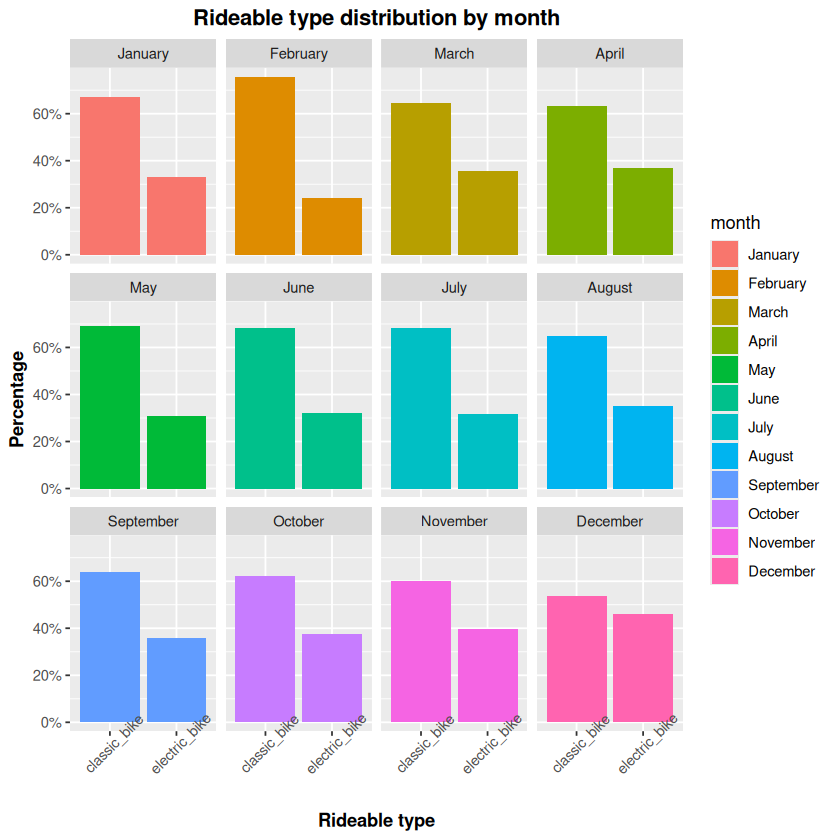

In [27]:
# aggregate ride counts and compute proportions
data_combined_rideable_type <- data_combined %>%
                               group_by(month, rideable_type) %>%
                               summarize(count=n(), .groups='drop') %>%
                               group_by(month) %>%
                               mutate(proportion=count/sum(count))

# plot the rideable type distribution
ggplot(data=data_combined_rideable_type) +
    geom_bar(mapping=aes(x=rideable_type, y=proportion, fill=month), stat='identity') +
    scale_y_continuous(labels=scales::percent_format()) +
    labs(title='Rideable type distribution by month', x='Rideable type', y='Percentage') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.text.x=element_text(angle=45), axis.title.x=element_text(face='bold'),
          axis.title.y=element_text(face='bold')) +
    facet_wrap(~month)

#### User Type Distribution by Month

This visualization compares the proportion of casual riders and annual members using Cyclistic bikes each month.

Key insights 💡:
- Annual members consistently outnumber casual riders.
- The difference is smaller in summer months, suggesting casual riders prefer using Cyclistic bikes more in warm weather.


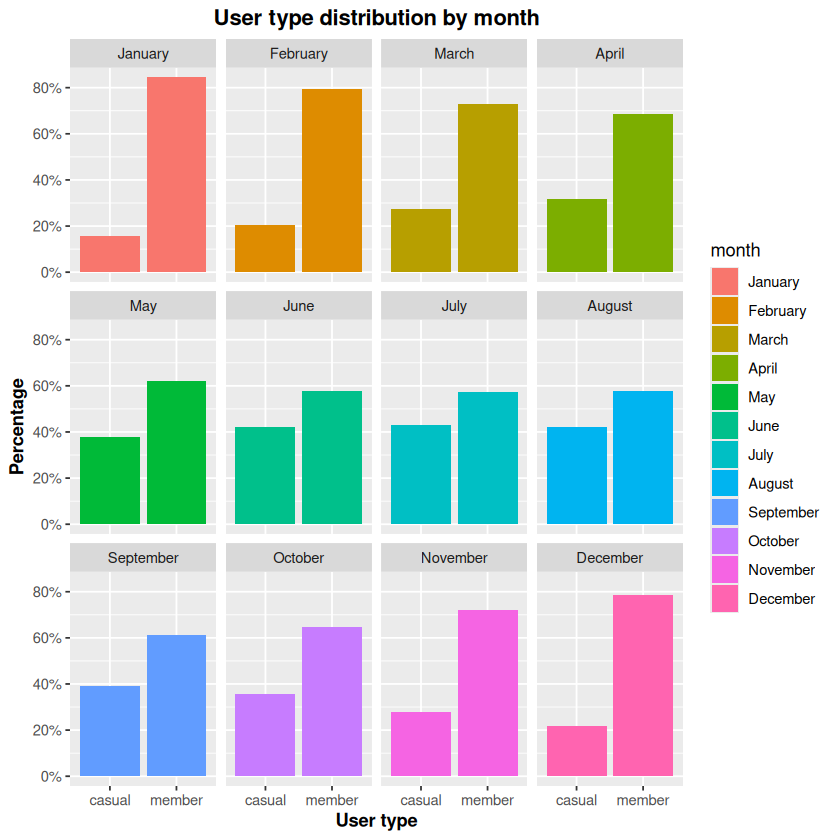

In [28]:
# aggregate user type counts and compute proportions
data_combined_member_casual <- data_combined %>%
                               group_by(month, member_casual) %>%
                               summarize(count=n(), .groups='drop') %>%
                               group_by(month) %>%
                               mutate(proportion=count/sum(count))

# plot the user type distribution
ggplot(data=data_combined_member_casual) +
    geom_bar(mapping=aes(x=member_casual, y=proportion, fill=month), stat='identity') +
    scale_y_continuous(labels=scales::percent_format()) +
    labs(title='User type distribution by month', x='User type', y='Percentage') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold')) +
    facet_wrap(~month)

#### Adding Ride Duration and Day of the Week Columns

I first calculate the ride duration and extract the day of the week for each ride.



In [29]:
# compute ride length in seconds
data_combined$ride_length <- as.numeric(difftime(data_combined$ended_at, data_combined$started_at, units='secs'))

# extract the day of the week
data_combined$day_of_week <- weekdays(data_combined$started_at)

#### Mean Ride Length by Month

This visualization highlights how ride duration varies across months for different user types. 

Key insight 💡:
- Casual riders tend to have significantly longer rides, especially during the summer.

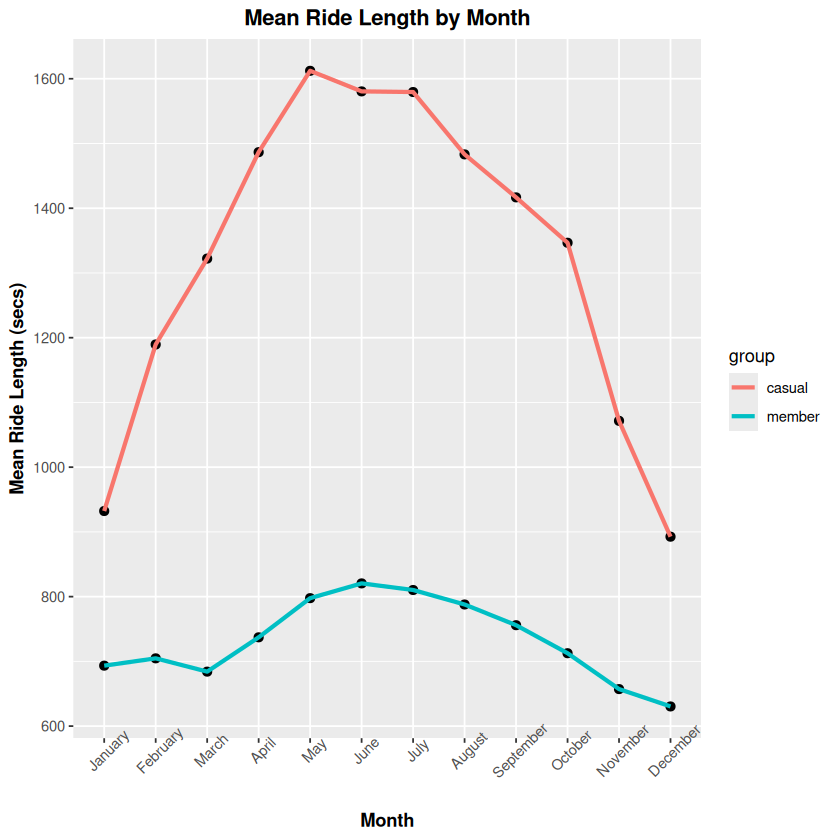

In [30]:
# compute mean ride length for annual members 
mean_ride_length_month_member <- data_combined %>%
                                 filter(member_casual == 'member') %>%
                                 group_by(month) %>%
                                 summarize(mean_ride_length = mean(ride_length), .groups = 'drop')

# compute mean ride length for casual riders
mean_ride_length_month_casual <- data_combined %>%
                                 filter(member_casual == 'casual') %>%
                                 group_by(month) %>%
                                 summarize(mean_ride_length = mean(ride_length), .groups = 'drop')

# combine results for plotting
mean_ride_length_month_combined <- bind_rows(
    mean_ride_length_month_member %>% mutate(group = 'member'),
    mean_ride_length_month_casual %>% mutate(group = 'casual')
)

# plot mean ride length by month
ggplot(data = mean_ride_length_month_combined) +
    geom_point(mapping = aes(x = month, y = mean_ride_length), size = 2.2) +
    geom_line(mapping = aes(x = month, y = mean_ride_length, group = group, color = group), linewidth = 1.2) +
    labs(title = 'Mean Ride Length by Month', x = 'Month', y = 'Mean Ride Length (secs)') +
    theme(plot.title = element_text(hjust = 0.5, face = 'bold'), 
          axis.title.x = element_text(face = 'bold'), 
          axis.title.y = element_text(face = 'bold'),
          axis.text.x = element_text(angle = 45))

#### Mean Ride Length by Day of the Week

This visualization highlights how ride duration varies across days of the week for different user types.

Key insight 💡:

- Both annual members and casual riders tend to have longer rides on weekends, but casual riders experience a much stronger weekend spike. 

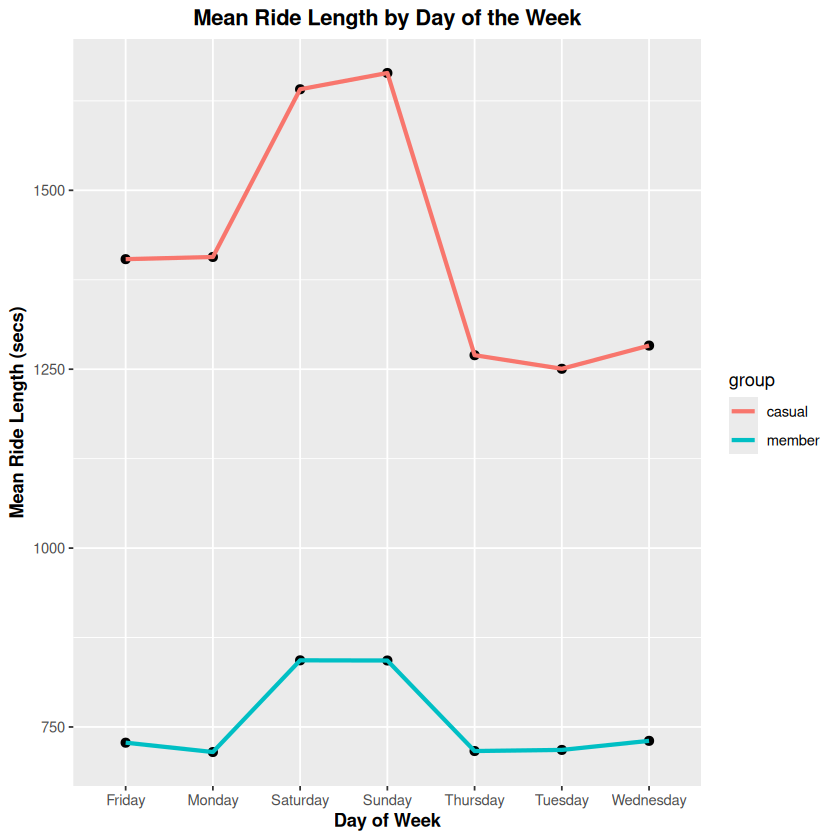

In [31]:
# compute mean ride length by day of the week for annual members
mean_ride_length_weekday_member <- data_combined %>%
                                   filter(member_casual == 'member') %>%
                                   group_by(day_of_week) %>%
                                   summarize(mean_ride_length = mean(ride_length), .groups = 'drop')

# compute mean ride length by day of the week for casual riders
mean_ride_length_weekday_casual <- data_combined %>% 
                                   filter(member_casual == 'casual') %>%
                                   group_by(day_of_week) %>%
                                   summarize(mean_ride_length = mean(ride_length), .groups = 'drop')

# combine results for plotting
mean_ride_length_weekday_combined <- bind_rows(
    mean_ride_length_weekday_member %>% mutate(group = 'member'),
    mean_ride_length_weekday_casual %>% mutate(group = 'casual')
)

# plot mean ride length by day of the week
ggplot(data = mean_ride_length_weekday_combined) +
    geom_point(mapping = aes(x = day_of_week, y = mean_ride_length), size = 2.2) +
    geom_line(mapping = aes(x = day_of_week, y = mean_ride_length, group = group, color = group), linewidth = 1.2) +
    labs(title = 'Mean Ride Length by Day of the Week', x = 'Day of Week', y = 'Mean Ride Length (secs)') +
    theme(plot.title = element_text(hjust = 0.5, face = 'bold'), 
          axis.title.x = element_text(face = 'bold'), 
          axis.title.y = element_text(face = 'bold'))

#### Number of Rides by Month

This analysis examines how ride frequency varies across the months of the year for annual members and casual riders.

Key insights 💡:

- Annual members take more trips compared to casual riders all year round.
- Peak usage occurs during summer months for both user groups, suggesting increased demand for outdoor activities.

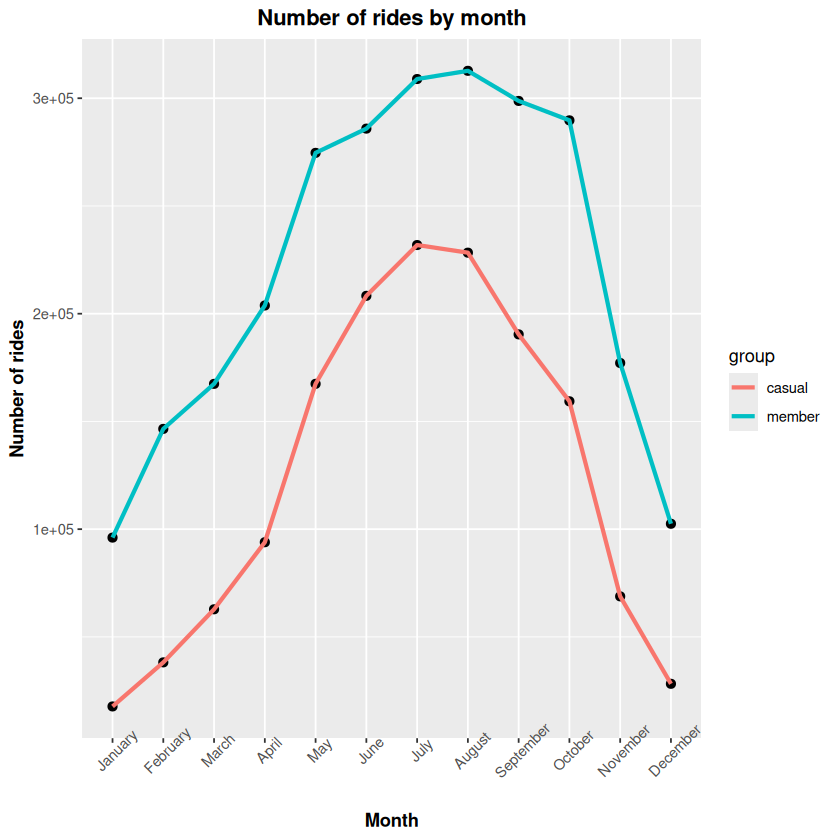

In [32]:
# compute number of rides per month for annual members
rides_month_member <- data_combined %>%
                      filter(member_casual=='member') %>%
                      group_by(month) %>%
                      summarize(num_rides=n(), .groups='drop')

# compute number of rides per month for casual riders
rides_month_casual <- data_combined %>%
                      filter(member_casual=='casual') %>%
                      group_by(month) %>%
                      summarize(num_rides=n(), .groups='drop')

# combine results for visualization
rides_month_combined <- bind_rows(
    rides_month_member %>% mutate(group='member'),
    rides_month_casual %>% mutate(group='casual')
)

# plot number of rides by month
ggplot(data=rides_month_combined) +
    geom_point(mapping=aes(x=month, y=num_rides), size=2.2) +
    geom_line(mapping=aes(x=month, y=num_rides, group=group, color=group), linewidth=1.2) +
    labs(title='Number of rides by month', x='Month', y='Number of rides') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold'),
          axis.text.x=element_text(angle=45))

#### Number of Rides by Day of the Week

Analyzing ride distribution across the days of the week helps differentiate user habits.

Key insights 💡:

- Annual members ride more frequently on weekdays, likely for commuting and routine travel.
- Ride frequency peaks for casual riders on weekends, indicating recreational use.

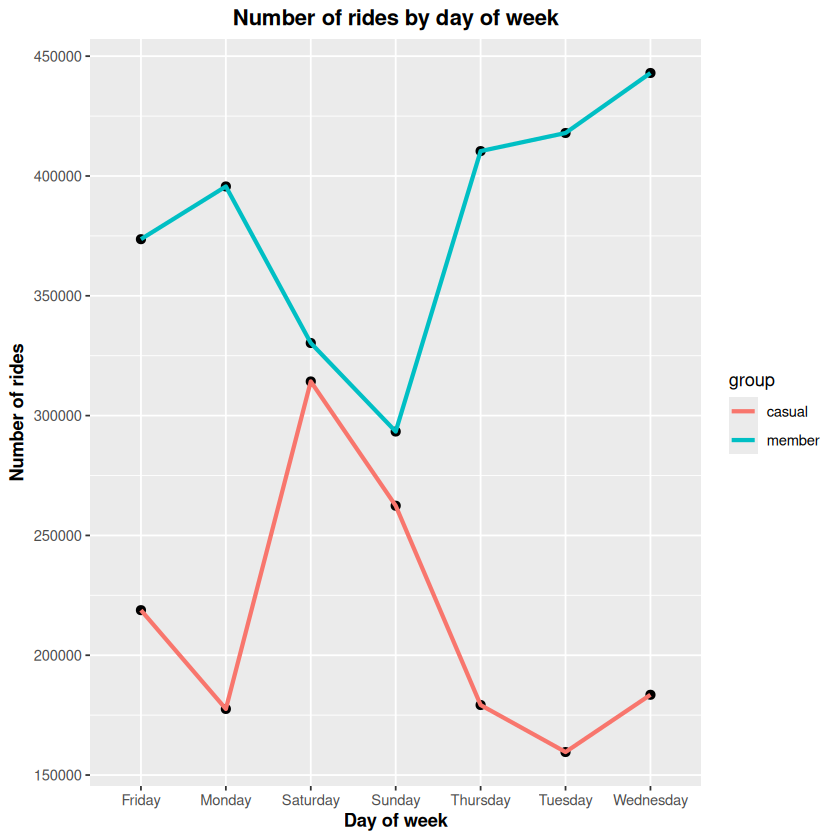

In [33]:
# compute number of rides per day of the week for annual members
rides_weekday_member <- data_combined %>%
                        filter(member_casual=='member') %>%
                        group_by(day_of_week) %>%
                        summarize(num_rides=n(), .groups='drop')

# compute number of rides per day of the week for casual riders
rides_weekday_casual <- data_combined %>%
                        filter(member_casual=='casual') %>%
                        group_by(day_of_week) %>%
                        summarize(num_rides=n(), .groups='drop')

# combine results for visualization
rides_weekday_combined <- bind_rows(
    rides_weekday_member %>% mutate(group='member'),
    rides_weekday_casual %>% mutate(group='casual')
)

# plot number of rides by day of the week
ggplot(data=rides_weekday_combined) +
   geom_point(mapping=aes(x=day_of_week, y=num_rides), size=2.2) +
   geom_line(mapping=aes(x=day_of_week, y=num_rides, group=group, color=group), linewidth=1.2) +
   labs(title='Number of rides by day of week', x='Day of week', y='Number of rides') +
   theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold'))

#### Distribution of Ride Lengths

This density plot visualizes the distribution of ride durations for both annual members and casual riders.

Key insights 💡:

- Annual members tend to have shorter and more consistent ride durations, with a narrower distribution, suggesting shorter, purpose-driven trips (e.g., commuting).
- Casual riders' ride durations are more spread out, with a longer tail, indicating occasional, longer rides, likely for leisure or exploration.

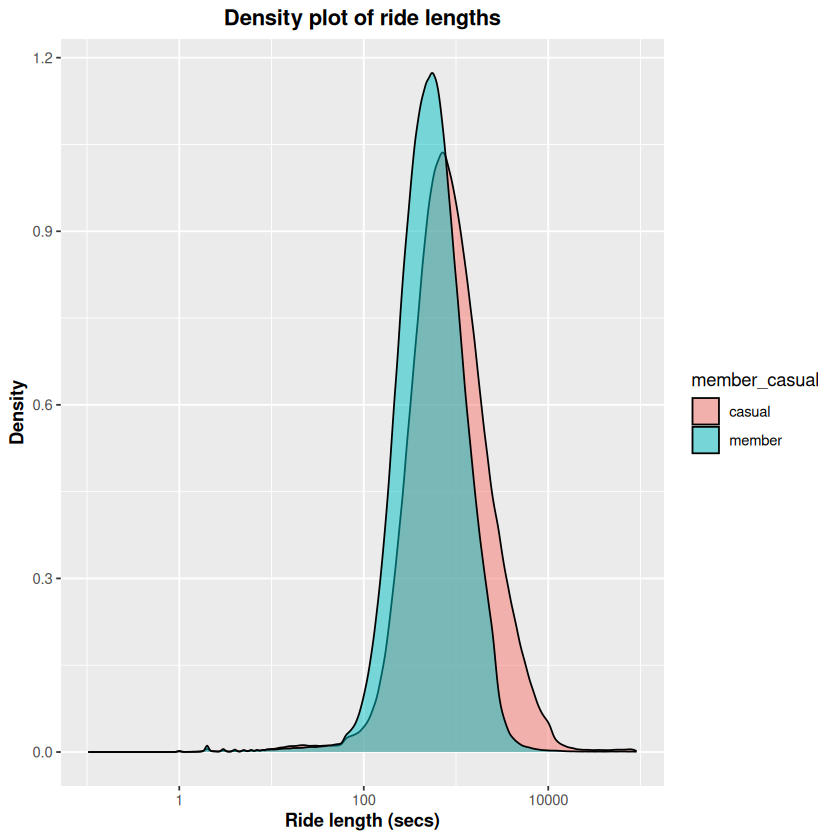

In [34]:
ggplot(data=data_combined) +
    geom_density(mapping=aes(x=ride_length, fill=member_casual), alpha=0.5) +
    scale_x_log10() +
    labs(title='Density plot of ride lengths', x='Ride length (secs)', y='Density') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold'))

#### Ride Start Times

This histogram examines the distribution of ride start times throughout the day for different user groups.

Key insights 💡:

- Casual riders have a single peak at 5 PM, indicating late afternoon rides, possibly for leisure or commuting home.
- Annual members have two peak hours: 8 AM and 5 PM, aligning with morning and evening commute times.

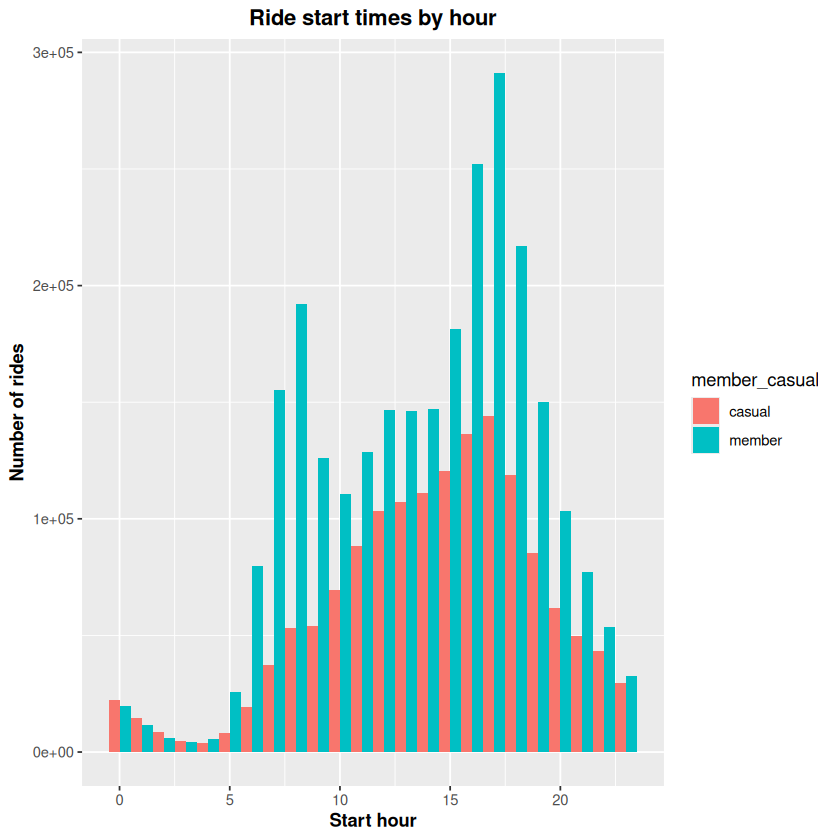

In [35]:
# extract the hour from the 'started_at' datetime column and create a new column 'start_hour'
data_combined <- data_combined %>%
                 mutate(start_hour=lubridate::hour(started_at))

ggplot(data=data_combined) +
    geom_histogram(mapping=aes(x=start_hour, fill=member_casual), position='dodge', bins=24) +
    labs(title='Ride start times by hour', x='Start hour', y='Number of rides') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold'))

#### Rideable Type Preference

To analyze user preferences for different bike types, we calculated the proportion of rides taken on each rideable type (classic vs. electric) for both annual members and casual riders.

Key insight 💡:

- Both user groups prefer classic bikes over electric bikes.

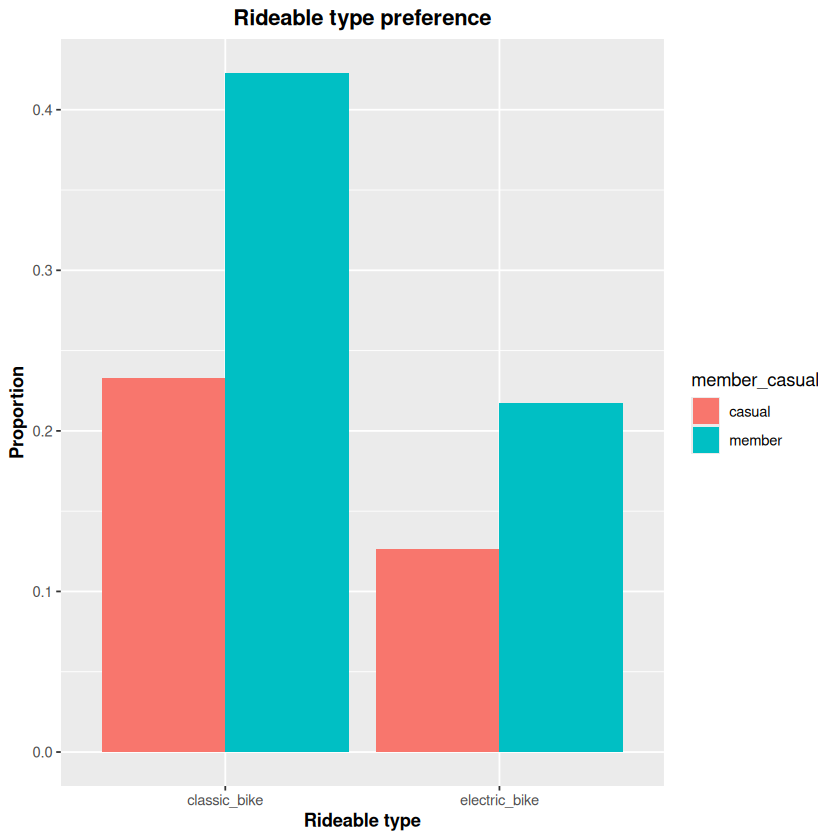

In [36]:
# summarize rideable type preference by user type
rideable_type_summary <- data_combined %>%
                         group_by(member_casual, rideable_type) %>%
                         summarize(count=n(), .groups='drop') %>%
                         mutate(proportion=count/sum(count))

# plot rideable type preference by user type
ggplot(data=rideable_type_summary) +
    geom_bar(mapping=aes(x=rideable_type, y=proportion, fill=member_casual), stat='identity', position='dodge') +
    labs(title='Rideable type preference', x='Rideable type', y='Proportion') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold'))


#### Seasonal Trends in Bike Usage

To examine seasonal variations in bike usage, I classified each ride based on the corresponding season (Winter, Spring, Summer, Fall).

Key insights 💡:

- Both casual riders and annual members ride more during the summer, likely due to favorable weather conditions.
- However, casual riders experience a steeper decline in usage during non-summer months, while annual members maintain relatively consistent usage throughout the year.

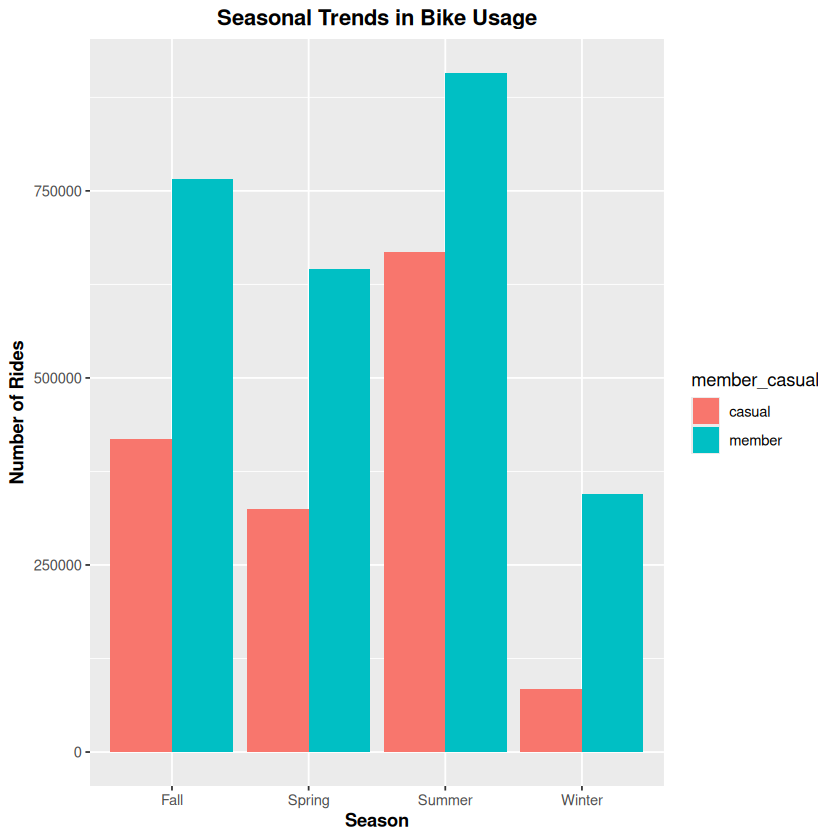

In [37]:
# create a new column indicating the season based on the ride month
data_combined <- data_combined %>%
                 mutate(season = case_when(
                     month %in% c('December', 'January', 'February') ~ 'Winter',
                     month %in% c('March', 'April', 'May') ~ 'Spring',
                     month %in% c('June', 'July', 'August') ~ 'Summer',
                     month %in% c('September', 'October', 'November') ~ 'Fall'
                 ))

# aggregate number of rides per season for each user type
seasonal_data <- data_combined %>%
                 group_by(season, member_casual) %>%
                 summarize(num_rides = n(), .groups = 'drop')

# plot seasonal trends in bike usage
ggplot(data = seasonal_data) +
    geom_bar(mapping = aes(x = season, y = num_rides, fill = member_casual), 
             stat = 'identity', position = 'dodge') +
    labs(title = 'Seasonal Trends in Bike Usage', 
         x = 'Season', 
         y = 'Number of Rides') +
    theme(plot.title = element_text(hjust = 0.5, face = 'bold'), 
          axis.title.x = element_text(face = 'bold'), 
          axis.title.y = element_text(face = 'bold'))

#### Ride Distance Calculation

To analyze the distance traveled per ride, I calculated the ride distance (in meters) using the Haversine formula, which measures the great-circle distance between two latitude-longitude points.

In [38]:
install.packages('geosphere')

Installing package into ‘/home/nafsika/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



In [39]:
library(geosphere)

In [40]:
# calculate ride distance using the Haversine formula
data_combined <- data_combined %>%
                 mutate(distance=geosphere::distHaversine(
                     cbind(start_lat, start_lng),
                     cbind(end_lat, end_lng)
                 ))

#### Distance Distribution by User Type and Season

To examine seasonal trends in ride distances, I plotted a boxplot of ride distances for each user type across seasons.

Key insights 💡:

- The median ride distances and interquartile ranges (IQRs) are similar for both user types.
- Despite casual riders having longer average ride times, their ride distances are not significantly greater. This aligns with the finding that annual members take more frequent but shorter rides, as well as the fact that they outnumber casual riders.


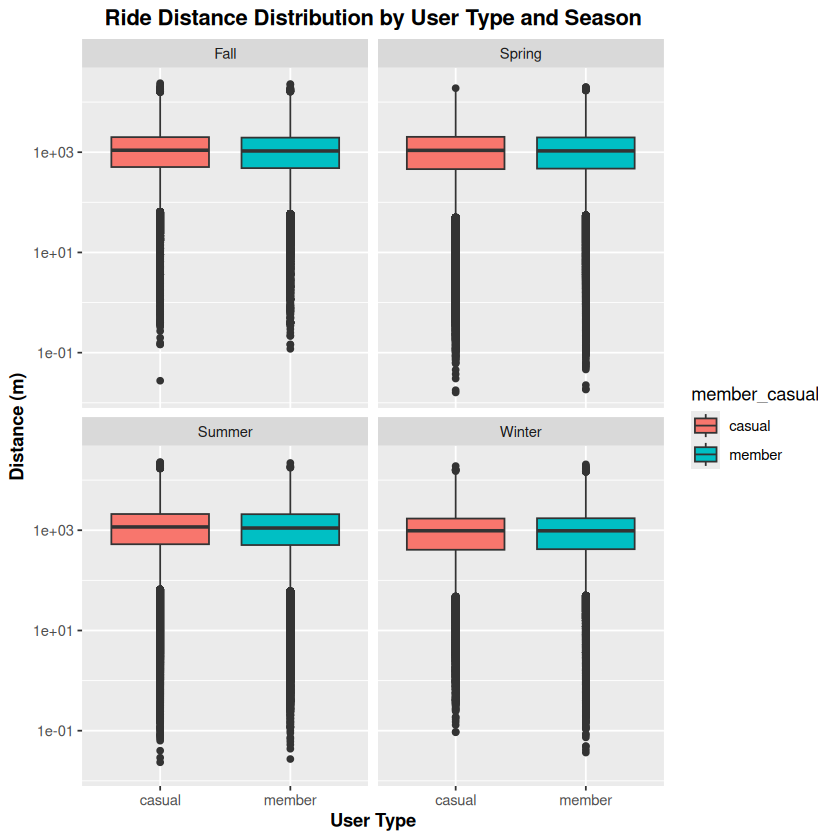

In [41]:
# filter out zero-distance rides to avoid data artifacts
distance_data <- data_combined %>%
                 filter(distance > 0)

# plot ride distance distribution by user type across seasons
ggplot(data = distance_data) +
   geom_boxplot(mapping = aes(x = member_casual, y = distance, fill = member_casual)) +
   scale_y_log10() +  # Log scale to handle skewed distance distribution
   labs(title = 'Ride Distance Distribution by User Type and Season', 
        x = 'User Type', 
        y = 'Distance (m)') +
   theme(plot.title = element_text(hjust = 0.5, face = 'bold'), 
         axis.title.x = element_text(face = 'bold'), 
         axis.title.y = element_text(face = 'bold')) +
   facet_wrap(~season)

#### Top 7 Start Stations

Finally, I visualize with a horizontal bar plot the top 7 preferred start stations for annual members and casual riders.

Top 7 start stations for annual members:

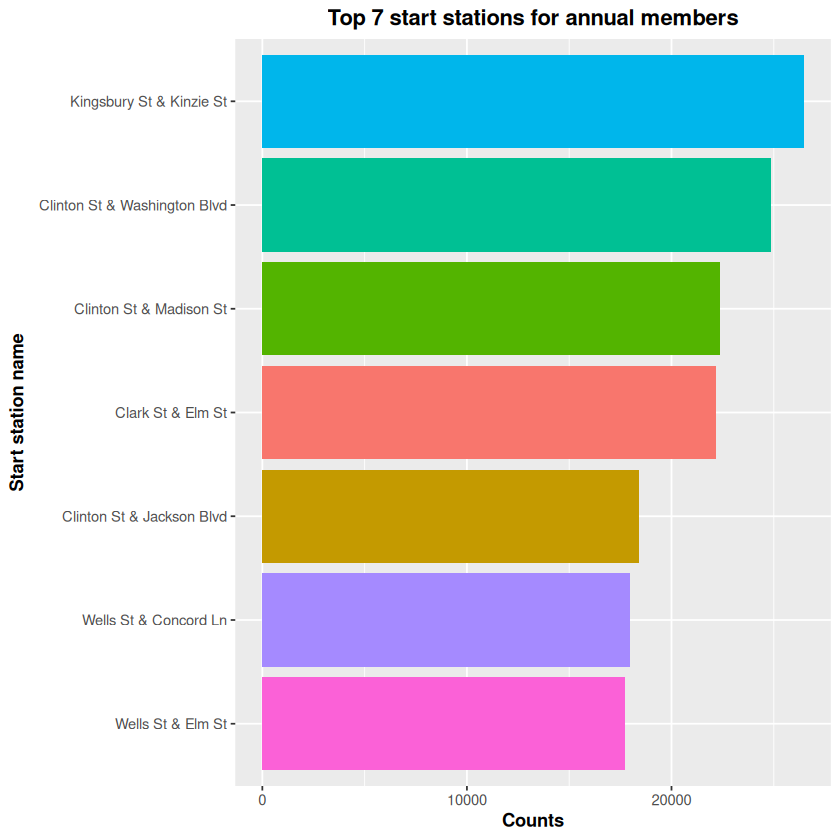

In [42]:
top_start_stations_member <- data_combined %>%
                             filter(member_casual=='member') %>%
                             count(start_station_name, sort=TRUE) %>%
                             slice_max(n, n=7)

ggplot(data=top_start_stations_member) +
    geom_bar(mapping=aes(x=reorder(start_station_name, n), y=n, fill=start_station_name), stat='identity') +
    coord_flip() +
    labs(title='Top 7 start stations for annual members', y='Counts', x='Start station name') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold')) +
    theme(legend.position='none')

Top 7 start stations for casual riders:

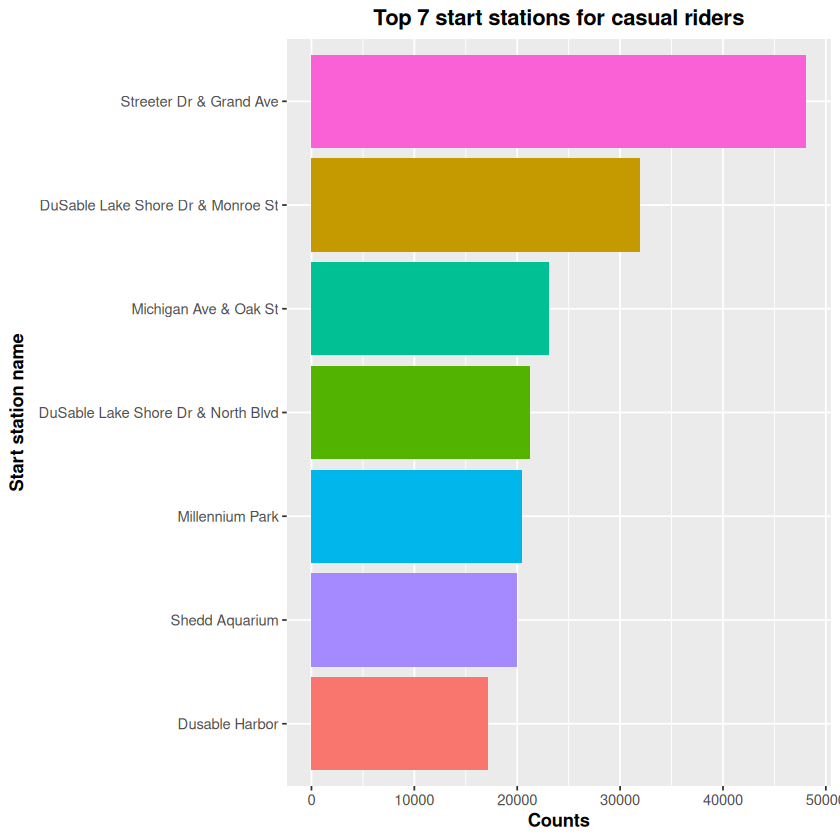

In [43]:
top_start_stations_casual <- data_combined %>%
                             filter(member_casual=='casual') %>%
                             count(start_station_name, sort=TRUE) %>%
                             slice_max(n, n=7)

ggplot(data=top_start_stations_casual) +
    geom_bar(mapping=aes(x=reorder(start_station_name, n), y=n, fill=start_station_name), stat='identity') +
    coord_flip() +
    labs(title='Top 7 start stations for casual riders', x='Start station name', y='Counts') +
    theme(plot.title=element_text(hjust=0.5, face='bold'), axis.title.x=element_text(face='bold'), axis.title.y=element_text(face='bold')) +
    theme(legend.position='none')

# Conclusion

The analysis of Cyclistic's bike-share data highlights key differences between casual riders and annual members. Annual members exhibit consistent, frequent usage, primarily on weekdays, suggesting their use is commuter-focused with shorter, purpose-driven trips. In contrast, casual riders show a more seasonal pattern, with peak usage in summer and longer rides, often on weekends, reflecting recreational use.

Both groups prefer classic bikes, with casual riders experiencing a sharper decline in usage during colder months. To increase annual memberships, Cyclistic should focus on converting casual riders by promoting the benefits of membership, particularly during peak summer months. Additionally, optimizing bike availability and station placements based on usage patterns can enhance service for both groups, aligning with their distinct travel behaviors.